# CNN_UTK_Model for AgeRange detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Data preprocessing

In [25]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [27]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [28]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [29]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

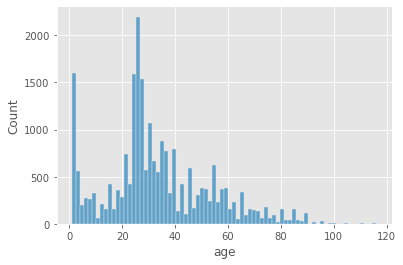

In [30]:
sns.histplot(data=df, x='age')

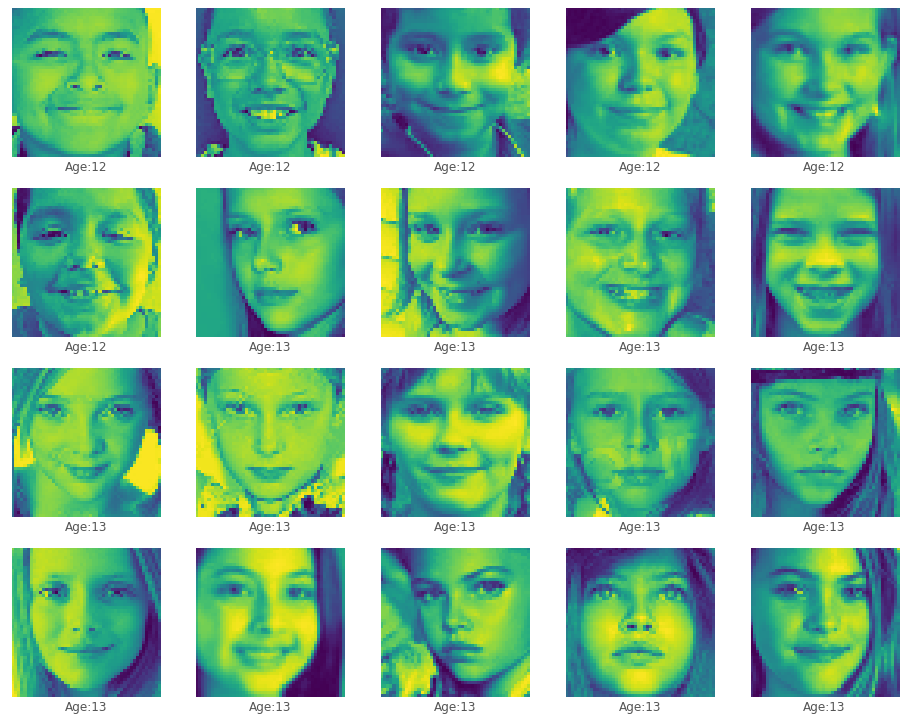

In [31]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [10]:
X = np.array(df['pixels'].tolist())
y = df['age'] // 5 # taking range of 5

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X = X.reshape(X.shape[0],48,48,1)

In [13]:
X[:5].shape

(5, 48, 48, 1)

In [14]:
y[:5].shape

(5,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model creation

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [17]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                135440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 135,617
Trainable params: 135,617
Non-trainable params: 0
_________________________________________________________________


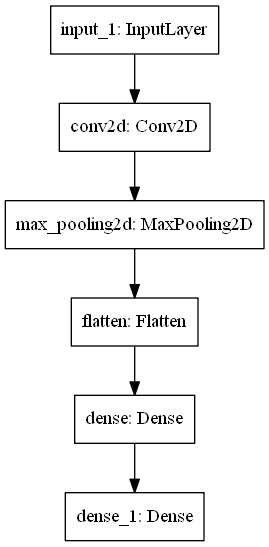

In [18]:
plot_model(model, to_file='models/cnn_utk_model_1_age-range.png')

In [19]:
filepath = 'checkpoints/age_range_model1_relu.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/50
333/334 [============================>.] - ETA: 0s - loss: 13.0306 - mae: 2.7630
Epoch 00001: val_loss improved from inf to 9.82700, saving model to checkpoints\age_range_model1_relu.epoch01-loss9.83.hdf5
334/334 [==============================] - 14s 43ms/step - loss: 13.0274 - mae: 2.7627 - val_loss: 9.8270 - val_mae: 2.5258
Epoch 2/50
334/334 [==============================] - ETA: 0s - loss: 8.2994 - mae: 2.2114
Epoch 00002: val_loss improved from 9.82700 to 7.15579, saving model to checkpoints\age_range_model1_relu.epoch02-loss7.16.hdf5
334/334 [==============================] - 15s 44ms/step - loss: 8.2994 - mae: 2.2114 - val_loss: 7.1558 - val_mae: 2.0198
Epoch 3/50
333/334 [============================>.] - ETA: 0s - loss: 7.1821 - mae: 2.0313- ETA: 1s - loss
Epoch 00003: val_loss improved from 7.15579 to 6.68687, saving model to checkpoints\age_range_model1_relu.epoch03-loss6.69.hdf5
334/334 [==============================] - 14s 43ms/step - loss: 7.1771 - mae: 2.03

Epoch 28/50
331/334 [============================>.] - ETA: 0s - loss: 3.2079 - mae: 1.3386
Epoch 00028: val_loss improved from 4.61391 to 4.58563, saving model to checkpoints\age_range_model1_relu.epoch28-loss4.59.hdf5
334/334 [==============================] - 6s 19ms/step - loss: 3.2084 - mae: 1.3392 - val_loss: 4.5856 - val_mae: 1.5100
Epoch 29/50
333/334 [============================>.] - ETA: 0s - loss: 3.1905 - mae: 1.3346
Epoch 00029: val_loss improved from 4.58563 to 4.55358, saving model to checkpoints\age_range_model1_relu.epoch29-loss4.55.hdf5
334/334 [==============================] - 6s 19ms/step - loss: 3.1892 - mae: 1.3344 - val_loss: 4.5536 - val_mae: 1.5313
Epoch 30/50
332/334 [============================>.] - ETA: 0s - loss: 3.1428 - mae: 1.3271- ETA: 1s - loss: 
Epoch 00030: val_loss did not improve from 4.55358
334/334 [==============================] - 6s 18ms/step - loss: 3.1413 - mae: 1.3270 - val_loss: 4.6272 - val_mae: 1.5280
Epoch 31/50
333/334 [============

<AxesSubplot:>

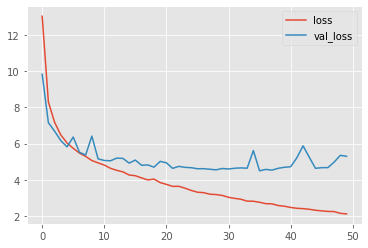

In [21]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [22]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

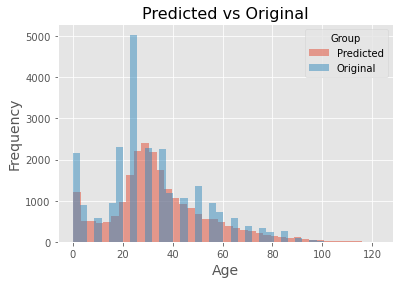

In [23]:
pd.Series((5 * y_pred.reshape((len(y_pred))))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
(5 * y).plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

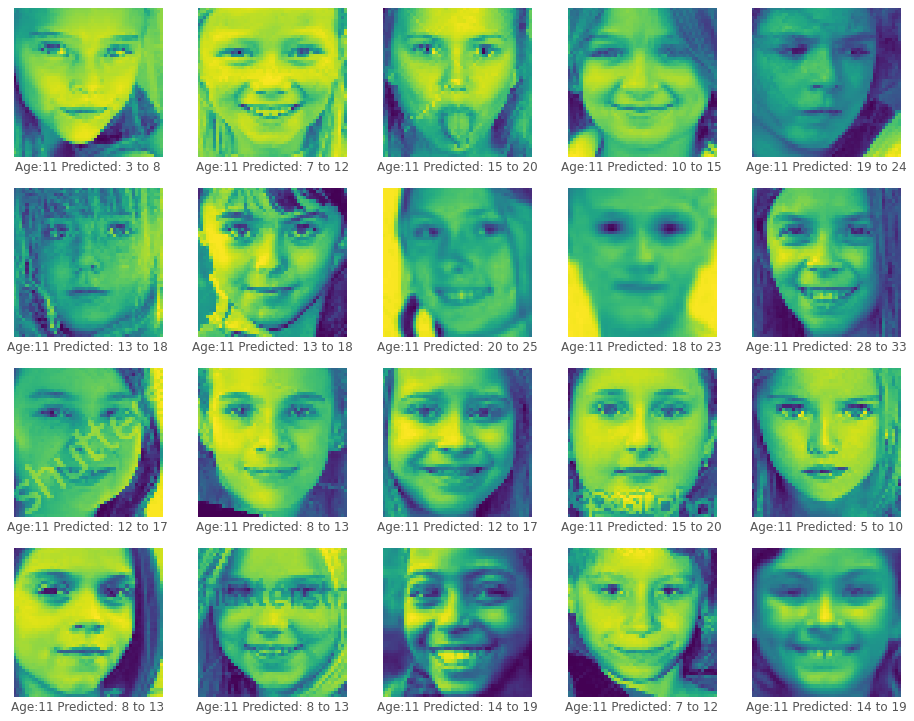

In [38]:
plt.figure(figsize=(16,16))
for i in range(1300,1320):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    pred_age = round((5 * (y_pred[i][0])))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(pred_age) + " to " + str(pred_age + 5))
plt.show()

### Predictions for best model

In [33]:
import os
path = os.getcwd() + r'\checkpoints\age_range_model1_relu.epoch36-loss4.50.hdf5'

In [34]:
best_model = tf.keras.models.load_model(path)

In [35]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

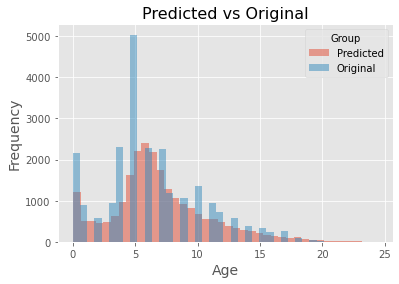

In [36]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

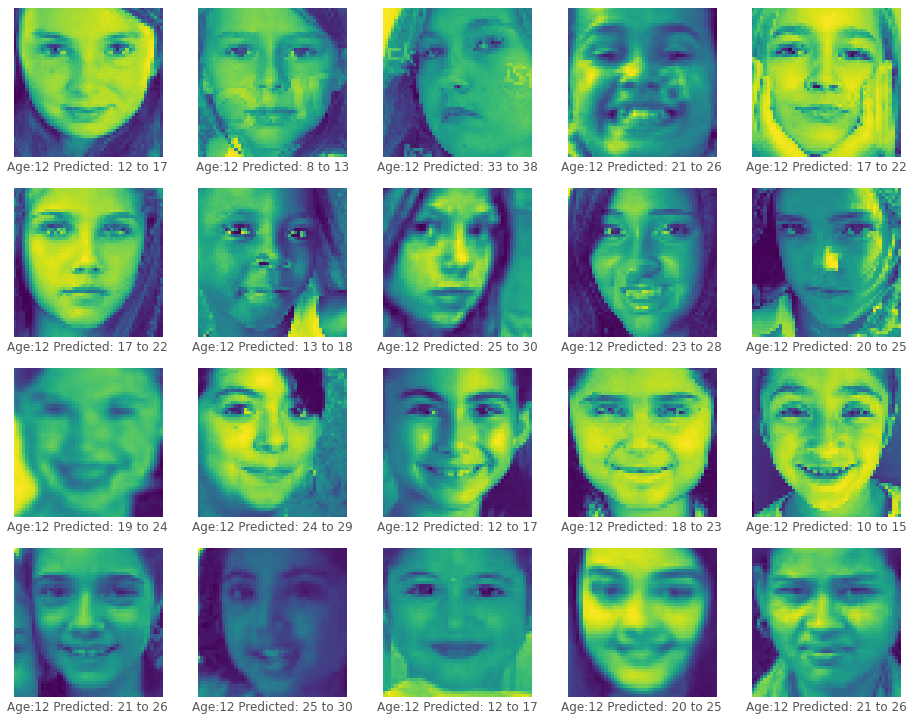

In [37]:
plt.figure(figsize=(16,16))
for i in range(1400,1420):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    pred_age = round((5 * (y_pred[i][0])))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(pred_age) + " to " + str(pred_age + 5))
plt.show()